In [1]:
!kaggle datasets download -d borhanitrash/animal-image-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/borhanitrash/animal-image-classification-dataset
License(s): MIT
 94% 36.0M/38.4M [00:03<00:00, 19.2MB/s]
100% 38.4M/38.4M [00:03<00:00, 12.5MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers, Model
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# unzipping the data:

!unzip -qq /content/animal-image-classification-dataset.zip

In [4]:
# reading the data:

path = '/content/Animals'

In [5]:
import pathlib
data_dir = pathlib.Path(path)

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))

In [7]:
image_count

3000

In [8]:
import PIL
import PIL.Image

In [9]:
cats = list(data_dir.glob('cats/*'))

# Cute Kitty:

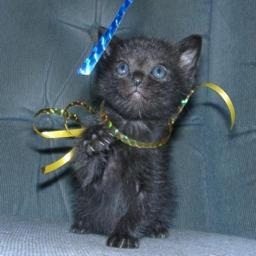

In [10]:
PIL.Image.open(str(cats[0]))

# Majestic Kitty:

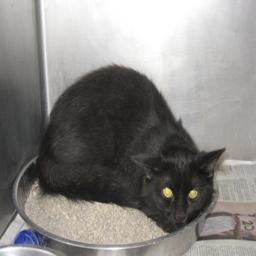

In [11]:
PIL.Image.open(str(cats[1]))

# Simply Beautiful Kitty:

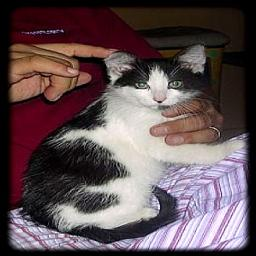

In [12]:
PIL.Image.open(str(cats[420]))

In [37]:
image_height = 256
image_width = 256
c_channels = 3
batch_size = 128

In [38]:
# loading images using keras:

x_train = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'training',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.


In [39]:
x_val = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 123,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 3000 files belonging to 3 classes.
Using 600 files for validation.


In [40]:
class_names = x_train.class_names

In [41]:
class_names

['cats', 'dogs', 'snakes']

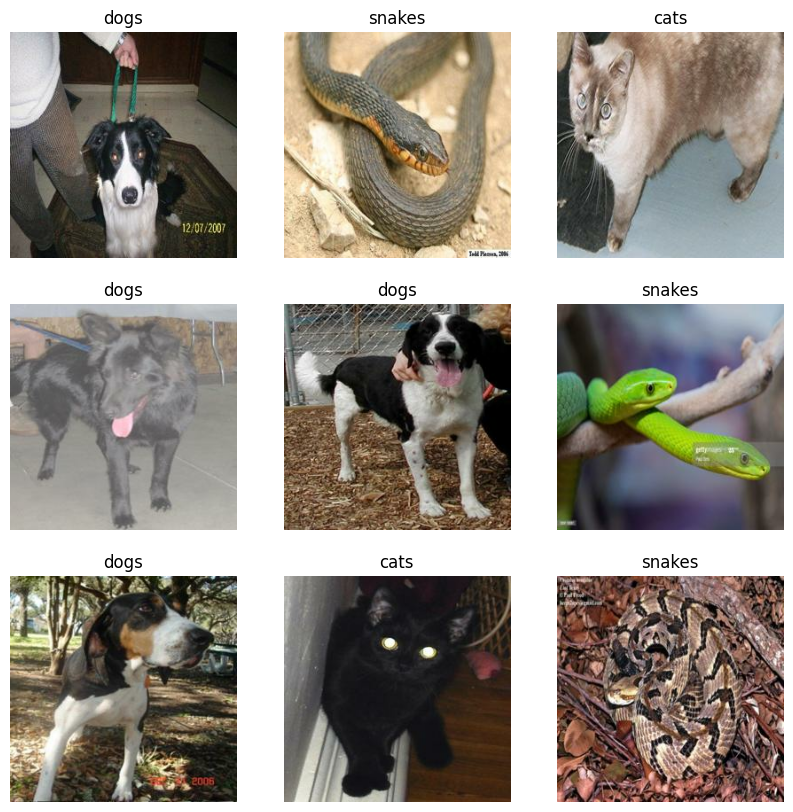

In [42]:
# visualizing the data as data:

plt.figure(figsize = (10, 10))
for images, labels in x_train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

In [43]:
for image_batch, labels_batch in x_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(image_batch[0])
  break

(128, 256, 256, 3)
(128,)
tf.Tensor(
[[[103. 139. 165.]
  [101. 137. 163.]
  [ 99. 135. 161.]
  ...
  [ 89. 114. 119.]
  [ 96. 120. 124.]
  [108. 132. 136.]]

 [[107. 143. 169.]
  [103. 139. 165.]
  [100. 136. 162.]
  ...
  [ 91. 116. 121.]
  [ 94. 117. 123.]
  [100. 124. 128.]]

 [[106. 142. 168.]
  [103. 139. 165.]
  [101. 137. 163.]
  ...
  [ 87. 115. 119.]
  [ 84. 109. 114.]
  [ 83. 108. 113.]]

 ...

 [[ 41.  77.  39.]
  [ 43.  79.  41.]
  [ 37.  73.  35.]
  ...
  [ 32.  64.  40.]
  [ 27.  59.  35.]
  [ 21.  53.  29.]]

 [[ 24.  60.  22.]
  [ 39.  75.  37.]
  [ 46.  82.  44.]
  ...
  [ 30.  62.  38.]
  [ 26.  58.  35.]
  [ 21.  53.  30.]]

 [[ 19.  55.  17.]
  [ 40.  76.  38.]
  [ 52.  88.  50.]
  ...
  [ 29.  61.  37.]
  [ 25.  57.  34.]
  [ 22.  54.  31.]]], shape=(256, 256, 3), dtype=float32)


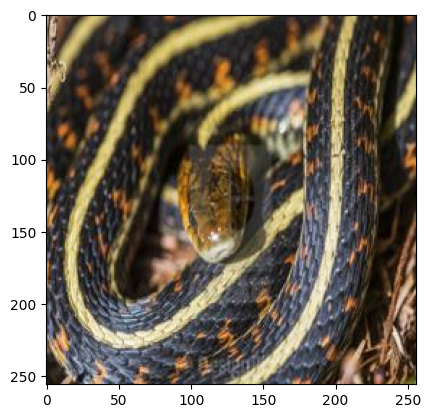

In [44]:
plt.imshow(image_batch[29].numpy().astype('uint8'))
plt.show()

In [45]:
# Normalization layer:

normalization_layer = layers.Rescaling(1./255)

In [46]:
# Applying normalization to the data:

normalized_ds = x_train.map(lambda x, y: (normalization_layer(x),y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]

In [47]:
first_image

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[0.47058827, 0.43921572, 0.427451  ],
        [0.48627454, 0.454902  , 0.4431373 ],
        [0.49803925, 0.4666667 , 0.454902  ],
        ...,
        [0.67058825, 0.627451  , 0.6039216 ],
        [0.67058825, 0.627451  , 0.6039216 ],
        [0.53333336, 0.4901961 , 0.4666667 ]],

       [[0.4784314 , 0.44705886, 0.43529415],
        [0.4901961 , 0.45882356, 0.44705886],
        [0.49803925, 0.4666667 , 0.454902  ],
        ...,
        [0.67058825, 0.627451  , 0.6039216 ],
        [0.654902  , 0.6117647 , 0.5882353 ],
        [0.52156866, 0.4784314 , 0.454902  ]],

       [[0.49411768, 0.46274513, 0.45098042],
        [0.49803925, 0.4666667 , 0.454902  ],
        [0.5058824 , 0.47450984, 0.46274513],
        ...,
        [0.6627451 , 0.627451  , 0.5921569 ],
        [0.64705884, 0.6117647 , 0.5764706 ],
        [0.5372549 , 0.5019608 , 0.4666667 ]],

       ...,

       [[0.227451  , 0.15294118, 0.16862746],
        [0.36

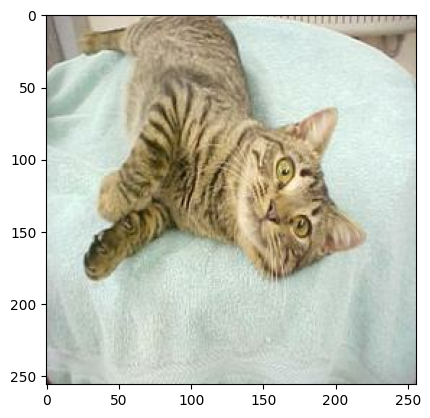

In [48]:
plt.imshow(first_image)
plt.show()

In [49]:
print(f' Min: {np.min(first_image)}, Max: {np.max(first_image)}')

 Min: 0.0, Max: 1.0


Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data:

* `Dataset.cache` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

* `Dataset.prefetch` overlaps data preprocessing and model execution while training.

In [50]:
# Configuring the dataset for performance:

AUTOTUNE = tf.data.AUTOTUNE

train_ds = x_train.cache().prefetch(buffer_size = AUTOTUNE)
val_ds = x_val.cache().prefetch(buffer_size = AUTOTUNE)

# Defining the model using Subclassing API

In [51]:

class CNN(Model):

  def __init__(self, num_classes, n_filters = 64, filter_dim = (3,3), pool_dim = (2,2), n_conv = 2, n_neurons = 64, n_dense = 4,
               dropout = 0.2, activation = 'relu', image_height = 256, image_width = 256, c_channels = 3):
    super(CNN, self).__init__()

    self.num_classes = num_classes
    self.n_filters = n_filters
    self.filter_dim = filter_dim
    self.pool_dim = pool_dim
    self.n_conv = n_conv
    self.n_neurons = n_neurons
    self.n_dense = n_dense
    self.dropout = dropout
    self.activation = activation
    self.image_height = image_height
    self.image_width = image_width
    self.c_channels = c_channels

    self.stacks = []

    # self.stacks.append(layers.InputLayer(input_shape = (image_height, image_width, c_channels)))

    self.stacks.append(layers.Conv2D(filters = n_filters, kernel_size = filter_dim,
                                     activation = activation, input_shape = (image_height, image_width, c_channels)))
    self.stacks.append(layers.MaxPooling2D(pool_dim))
    self.stacks.append(layers.BatchNormalization())
    self.stacks.append(layers.Dropout(dropout))

    for i in range(n_conv):
      self.stacks.append(layers.Conv2D(filters = n_filters, kernel_size = filter_dim, activation = activation))
      self.stacks.append(layers.MaxPooling2D(pool_dim))
      self.stacks.append(layers.BatchNormalization())
      self.stacks.append(layers.Dropout(dropout))

    self.stacks.append(layers.Flatten())

    for i in range(n_dense):
      self.stacks.append(layers.Dense(n_neurons, activation = activation))
      self.stacks.append(layers.BatchNormalization())
      self.stacks.append(layers.Dropout(dropout))

    self.stacks.append(layers.Dense(num_classes, activation = 'softmax'))

  def call(self, inputs):
    x = inputs
    for layer in self.stacks:
      x = layer(x)
    return x


In [52]:
model = CNN(num_classes = len(class_names))

In [53]:
model.build(input_shape = (batch_size, image_height, image_width, c_channels))

In [54]:
model.summary()

Model: "cnn_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           multiple                  1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  multiple                  0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Bat  multiple                  256       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         multiple                  0         
                                                                 
 conv2d_4 (Conv2D)           multiple                  36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  multiple                  0     

In [55]:
from keras.utils import plot_model

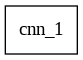

In [56]:
plot_model(model, show_shapes = True, show_layer_names = True)

In [57]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [58]:
n_epochs = 20

In [59]:
model.fit(train_ds, validation_data = val_ds, epochs = n_epochs)

Epoch 1/20
19/19 [==============================] - 44s 1s/step - loss: 1.3034 - accuracy: 0.4492 - val_loss: 4.9549 - val_accuracy: 0.3417
Epoch 2/20
19/19 [==============================] - 15s 812ms/step - loss: 0.9433 - accuracy: 0.5667 - val_loss: 2.9017 - val_accuracy: 0.3433
Epoch 3/20
19/19 [==============================] - 16s 820ms/step - loss: 0.8769 - accuracy: 0.5962 - val_loss: 1.4766 - val_accuracy: 0.3883
Epoch 4/20
19/19 [==============================] - 15s 815ms/step - loss: 0.7711 - accuracy: 0.6392 - val_loss: 1.1963 - val_accuracy: 0.4400
Epoch 5/20
19/19 [==============================] - 15s 807ms/step - loss: 0.7153 - accuracy: 0.6662 - val_loss: 1.6676 - val_accuracy: 0.3683
Epoch 6/20
19/19 [==============================] - 15s 807ms/step - loss: 0.6574 - accuracy: 0.7017 - val_loss: 0.7349 - val_accuracy: 0.6533
Epoch 7/20
19/19 [==============================] - 15s 806ms/step - loss: 0.6090 - accuracy: 0.7258 - val_loss: 0.8876 - val_accuracy: 0.5917
Ep

In [61]:
# saving the model:

model.save('model.tf')

In [62]:
# loading the model:
model = keras.models.load_model('model.tf')

In [63]:
# testing the model on outside data:

import os
import cv2 as cv

In [66]:
# loading an image from the internet :

image = cv.imread('/content/istockphoto-1443562748-612x612.jpg')

In [67]:
image.shape

(531, 612, 3)

In [68]:
# resizing the image:

image = cv.resize(image, (image_height, image_width))

# Alien-lookin Kitty:

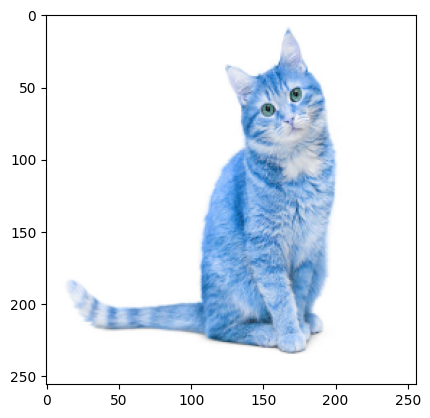

In [69]:
# displaying the image:

plt.imshow(image)
plt.show()

In [70]:
# fixing the coloring of the image:

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Johnny Catsville Kitty: ifykyk

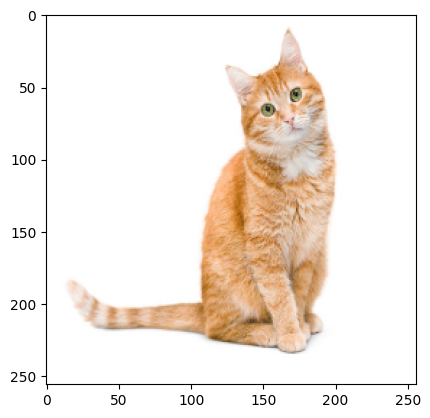

In [71]:
plt.imshow(image)
plt.show()

In [73]:
# preparing the image:

image = image.astype('float32')/255.0

In [74]:
# feeding the image to the model:

prediction = model.predict(np.array([image]))
print(prediction)

1/1 [==============================] - 1s 784ms/step
[[9.9030149e-01 8.9453189e-03 7.5322384e-04]]


In [80]:
# printing the prediction
result = np.argmax(prediction)
print(f'Result : {result}, Class: {x_train.class_names[result]}')

Result : 0, Class: cats


In [75]:
'''
NOTE: this didn't work prior to the use of normalization layer above ^^
# feeding the new image to the model:

prediction = model.predict(np.array([image]))
print(prediction)'''

"\nNOTE: this didn't work prior to the use of normalization layer above ^^\n# feeding the new image to the model:\n\nprediction = model.predict(np.array([image]))\nprint(prediction)"